In [100]:

import os


import pandas as pd
import numpy as np

import csv


from wordcloud import WordCloud


import matplotlib.pyplot as plt
import seaborn as sns

import nltk

from nltk.tokenize import word_tokenize

import spacy

import gensim
from gensim.models import LdaModel
from gensim.models import CoherenceModel

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

import pyLDAvis.gensim
import warnings

import gensim.corpora as corpora
from gensim.models import LsiModel




In [2]:
os.chdir(r"C:\Users\steve\OneDrive\Dokumenter\HSE\Theses\Wiki_Movies")
print(os.getcwd())

C:\Users\steve\OneDrive\Dokumenter\HSE\Theses\Wiki_Movies


# Loading data

Data set from https://github.com/prust/wikipedia-movie-data

In [3]:
# convert from json to data frame
df1 = pd.read_json("movies-1990s.json")
df2 = pd.read_json("movies-2000s.json")
df3 = pd.read_json("movies-2010s.json")



# add into one data frame
df = pd.concat([df1, df2, df3], ignore_index=True)

if len(df1.index) + len(df2.index) + len(df3.index) == len(df.index):
    print('Data Frames added correctly')
else:
    print('Data Frames not added correctly')

Data Frames added correctly


# Preprocessing 

In [4]:
# get columns
print('Columns original Data Frame: ', df.columns)



Columns original Data Frame:  Index(['title', 'year', 'cast', 'genres', 'href', 'extract', 'thumbnail',
       'thumbnail_width', 'thumbnail_height'],
      dtype='object')


In [5]:
# drop columns we dont want to use
df.drop(df.columns[[6,7,8]], axis=1, inplace=True)


#  Check columns final data frame
print('Columns new Data Frame: ', df.columns)

Columns new Data Frame:  Index(['title', 'year', 'cast', 'genres', 'href', 'extract'], dtype='object')


In [6]:
df.sample(10)

title  year  \
1080  Gary Larson's Tales from the Far Side  1994   
1894                                 Scream  1996   
1589                             Waterworld  1995   
5588                                 Crayon  2010   
4638                  The Other Boleyn Girl  2008   
3426                      Maid in Manhattan  2002   
4963                   The Song of Sparrows  2009   
7583                        Five Feet Apart  2019   
7429                             Extinction  2018   
5773                           Dolphin Tale  2011   

                                                   cast  \
1080                                                 []   
1894  [David Arquette, Neve Campbell, Courteney Cox,...   
1589  [Kevin Costner, Dennis Hopper, Jeanne Trippleh...   
5588  [Kahoe Howard Hon, Faisal Abdullah, Joshry Ada...   
4638  [Natalie Portman, Scarlett Johansson, Eric Ban...   
3426  [Jennifer Lopez, Ralph Fiennes, Natasha Richar...   
4963                                        [Reza Naji]   
7583                [Cole Sprouse, Haley Lu Richardson]   
7429  [Michael Peña, Lizzy Caplan, Mike Colter, Lill...   
5773  [Harry Connick Jr., Ashley Judd, Morgan Freema...   

                            genres                                     href  \
1080             [Animated, Short]  Gary_Larson%27s_Tales_from_the_Far_Side   
1894             [Horror, Slasher]                       Scream_(1996_film)   
1589                      [Action]                               Waterworld   
5588                       [Drama]                            Crayon_(film)   
4638  [Drama, Historical, Romance]        The_Other_Boleyn_Girl_(2008_film)   
3426      [Romance, Comedy, Drama]                        Maid_in_Manhattan   
4963                       [Drama]                     The_Song_of_Sparrows   
7583              [Drama, Romance]                          Five_Feet_Apart   
7429     [Action, Science Fiction]                   Extinction_(2018_film)   
5773               [Drama, Family]                             Dolphin_Tale   

                                                extract  
1080  Gary Larson's Tales from the Far Side is an an...  
1894  Scream is a 1996 American slasher film directe...  
1589  Waterworld is a 1995 American post-apocalyptic...  
5588  Crayon is a 2010 Malaysian Malay-language dram...  
4638  The Other Boleyn Girl is a 2008 historical rom...  
3426  Maid in Manhattan is a 2002 American romantic ...  
4963  The Song of Sparrows is a 2008 Iranian drama f...  
7583  Five Feet Apart is a 2019 American romantic dr...  
7429  Extinction is a 2018 American science fiction ...  
5773  Dolphin Tale is a 2011 American 3D family dram...

In [7]:
# Check for duplicates
df.duplicated(subset = ['extract']).sum()

147

In [8]:
print('Length with duplicates: ', len(df.index))

Length with duplicates:  7791


In [9]:
df.drop_duplicates(subset = ['extract'],inplace = True)


In [10]:
print('Length with out duplicates: ', len(df.index))

Length with out duplicates:  7644


In [11]:
#  shorten genre description to three possible genres and sort alphabetically
row = 0

for genres in df['genres']:
    less_genres = genres[0:3]
    less_genres.sort()    
    df['genres'].loc[df.index[row]] = less_genres
    row += 1



C:\Users\steve\AppData\Local\Temp\ipykernel_11000\2571805667.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'].loc[df.index[row]] = less_genres
C:\Users\steve\AppData\Local\Temp\ipykernel_11000\2571805667.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'].loc[df.index[row]] = less_genres
C:\Users\steve\AppData\Local\Temp\ipykernel_11000\2571805667.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genr

In [12]:
df.head()

title  year  \
0  The Adventures of Ford Fairlane  1990   
1             After Dark, My Sweet  1990   
2                      Air America  1990   
3                            Alice  1990   
4                  Almost an Angel  1990   

                                                cast  \
0  [Andrew Dice Clay, Wayne Newton, Priscilla Pre...   
1            [Jason Patric, Rachel Ward, Bruce Dern]   
2     [Mel Gibson, Robert Downey, Jr., Nancy Travis]   
3  [Mia Farrow, Joe Mantegna, William Hurt, Alec ...   
4        [Paul Hogan, Elias Koteas, Charlton Heston]   

                       genres                             href  \
0   [Action, Comedy, Mystery]  The_Adventures_of_Ford_Fairlane   
1      [Crime, Mystery, Noir]             After_Dark,_My_Sweet   
2            [Action, Comedy]               Air_America_(film)   
3  [Comedy, Fantasy, Romance]                Alice_(1990_film)   
4    [Comedy, Drama, Fantasy]                  Almost_an_Angel   

                                             extract  
0  The Adventures of Ford Fairlane is a 1990 Amer...  
1  After Dark, My Sweet is a 1990 American neo-no...  
2  Air America is a 1990 American action comedy f...  
3  Alice is a 1990 American fantasy romantic come...  
4  Almost an Angel is a 1990 American fantasy com...

In [13]:
# Check that genres have only three categories
for cat in df['genres']:
    if len(cat) > 4:
        print('Reducing genres went wrong')

In [14]:
# Convert genres list to string in data frame


row = 0
for genres in df['genres']:
    listToStr = ' '.join([str(elem) for elem in genres])
    
    df['genres'].loc[df.index[row]] = listToStr
    row += 1



C:\Users\steve\AppData\Local\Temp\ipykernel_11000\1741275057.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'].loc[df.index[row]] = listToStr
C:\Users\steve\AppData\Local\Temp\ipykernel_11000\1741275057.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'].loc[df.index[row]] = listToStr
C:\Users\steve\AppData\Local\Temp\ipykernel_11000\1741275057.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres']

In [15]:
df.head()

title  year  \
0  The Adventures of Ford Fairlane  1990   
1             After Dark, My Sweet  1990   
2                      Air America  1990   
3                            Alice  1990   
4                  Almost an Angel  1990   

                                                cast                  genres  \
0  [Andrew Dice Clay, Wayne Newton, Priscilla Pre...   Action Comedy Mystery   
1            [Jason Patric, Rachel Ward, Bruce Dern]      Crime Mystery Noir   
2     [Mel Gibson, Robert Downey, Jr., Nancy Travis]           Action Comedy   
3  [Mia Farrow, Joe Mantegna, William Hurt, Alec ...  Comedy Fantasy Romance   
4        [Paul Hogan, Elias Koteas, Charlton Heston]    Comedy Drama Fantasy   

                              href  \
0  The_Adventures_of_Ford_Fairlane   
1             After_Dark,_My_Sweet   
2               Air_America_(film)   
3                Alice_(1990_film)   
4                  Almost_an_Angel   

                                             extract  
0  The Adventures of Ford Fairlane is a 1990 Amer...  
1  After Dark, My Sweet is a 1990 American neo-no...  
2  Air America is a 1990 American action comedy f...  
3  Alice is a 1990 American fantasy romantic come...  
4  Almost an Angel is a 1990 American fantasy com...

<Axes: ylabel='count'>

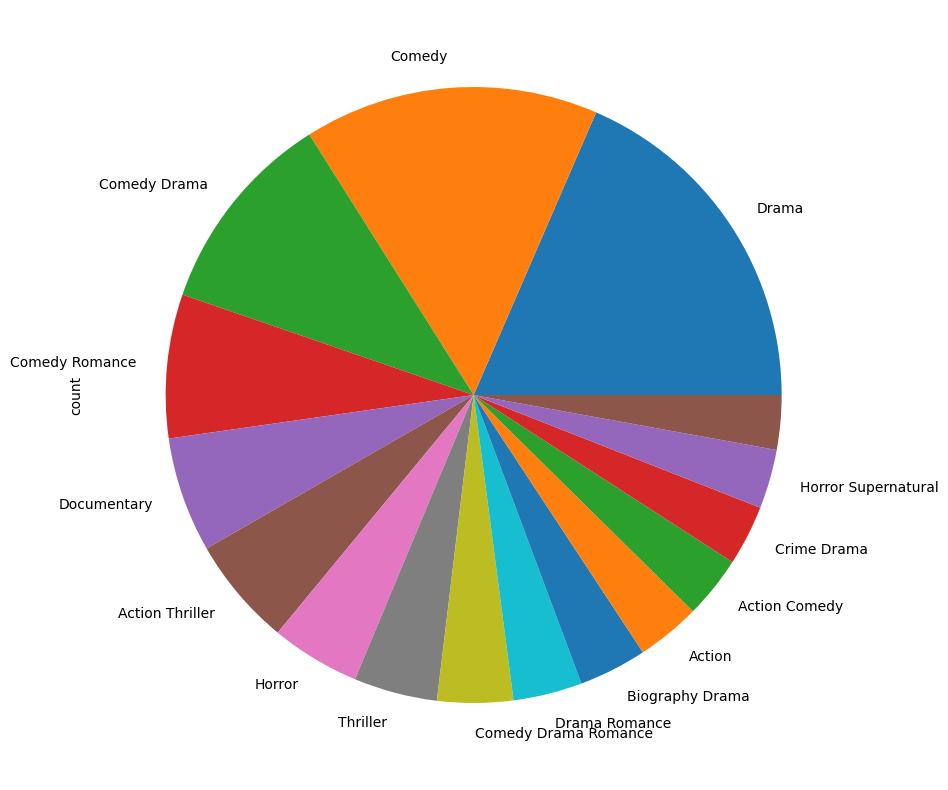

In [16]:
# count number of occurences each genres
genre_counts = df['genres'].value_counts()

# find unique ganres
unique_genres = np.unique(df['genres'])

# removing items with low counts from unique_gendres and  genre_counts
genre_counts = genre_counts[genre_counts > 100]


#  unique_genres= np.delete(unique_genres, [1, 7, 17])
#

# plotting

genre_counts.plot.pie(figsize=(10, 10))

We see that Drame, Comedy, and Comedy Drama are the biggest genres. Some movies dont have a defined genre, empty.

Find number of movies per genre

In [17]:
count =df.groupby(['genres'],)['genres'].count()

In [18]:
# sort descending order
sorted = count.sort_values(ascending 
                              = False)
print(sorted.head(15))

genres
Drama                   679
Comedy                  568
Comedy Drama            395
Comedy Romance          277
Documentary             222
Action Thriller         210
Horror                  172
Thriller                161
Comedy Drama Romance    146
Drama Romance           133
Biography Drama         131
Action                  123
Action Comedy           120
Crime Drama             116
Horror Supernatural     114
Name: genres, dtype: int64


Text(0.5, 1.0, 'Number of movies for top 15 Genres')

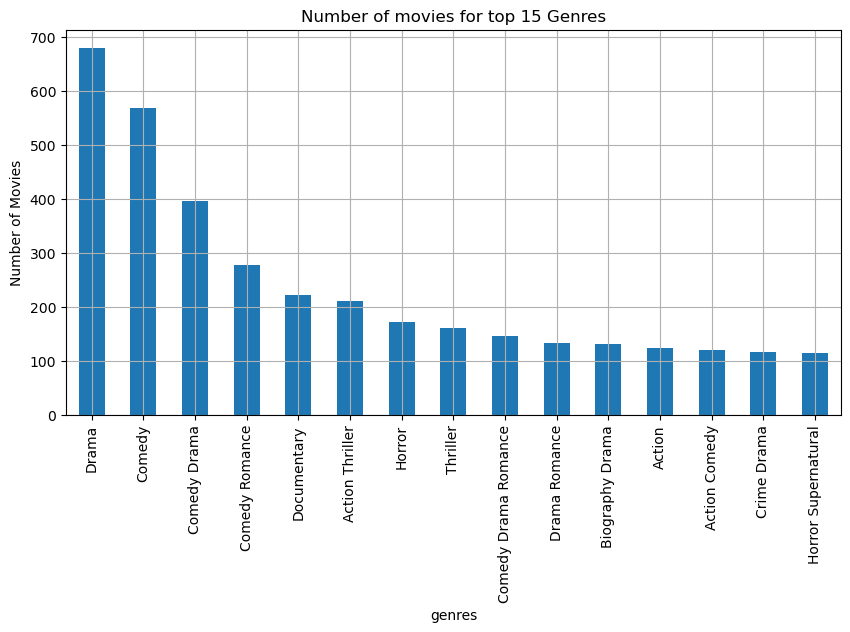

In [19]:
plt.figure(figsize=(10,5))
sorted.head(15).plot(kind ='bar', grid =True)
plt.ylabel('Number of Movies')
plt.title('Number of movies for top 15 Genres')

In [20]:
# Double checking number of movies in data frame
print(len(df.index))

7644


In [21]:
new_df = df['extract']

C:\Users\steve\AppData\Local\Temp\ipykernel_11000\3936860502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Extract_length_words'] = df['extract'].str.split().str.len()
C:\Users\steve\AppData\Local\Temp\ipykernel_11000\3936860502.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Extract_length_words']).set_title('Extract length distribution words');
C:\Users\steve\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarnin

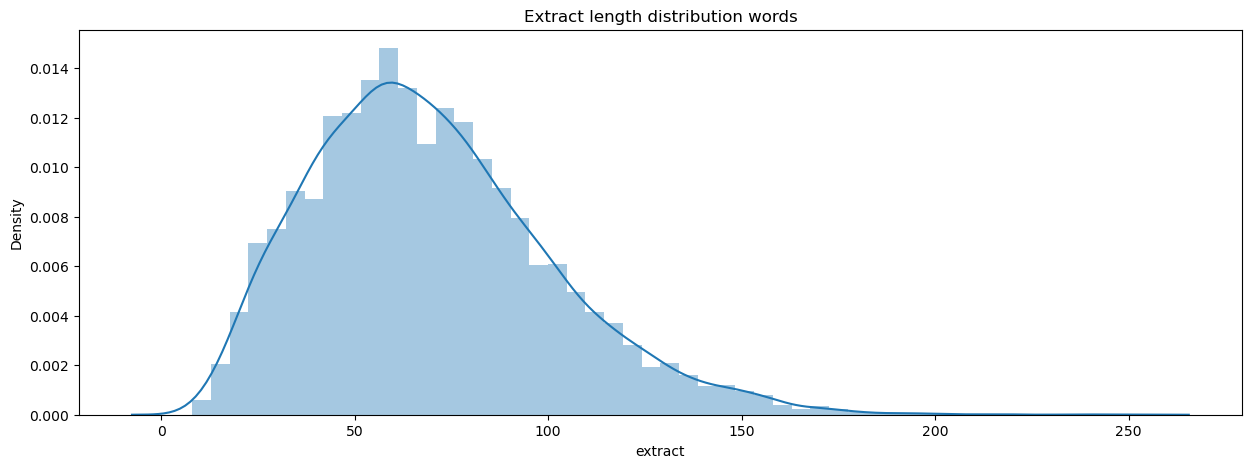

In [22]:
new_df['Extract_length_words'] = df['extract'].str.split().str.len()
plt.figure(figsize=(15, 5))
sns.distplot(new_df['Extract_length_words']).set_title('Extract length distribution words');


In [23]:
print(' Mean number of words in each document: ', new_df['Extract_length_words'].mean())

 Mean number of words in each document:  69.52400889702996


In [24]:
#  Check text exctract
print(df['extract'][0])

The Adventures of Ford Fairlane is a 1990 American action comedy mystery film directed by Renny Harlin and written by David Arnott, James Cappe, and Daniel Waters based on a story by Arnott and Cappe. The film stars comedian Andrew Dice Clay as the title character, Ford Fairlane, a "Rock n' Roll Detective", whose beat is the music industry in Los Angeles. True to his name, Ford drives a 1957 Ford Fairlane 500 Skyliner in the film.


We see that the extract contains of symbols that are not letters. We will remove these. First we find rows where extract is not in the string format

In [25]:
row = 0
counter = 0
to_delete = list()
for text in df['extract']:
    if type(text) != str:
        to_delete.append(row)        
        counter += 1
        
        
    row += 1

df_new = df.drop(to_delete)

In [26]:
print('Number of entries deleted from data frame: ', counter)

Number of entries deleted from data frame:  1


In [27]:
print('The new data set contains ', len(df_new.index), ' entries')

The new data set contains  7643  entries


In [28]:
#  Check that all non string entries in extract are deleted
row = 0
for text in df_new['extract']:
    if type(text) != str:
       print('Found exctrat of type not string', text, row)
    row += 1

Found exctrat of type not string nan 290


In [29]:
row = 0
for text in df_new['extract']:
    if type(text) != str:
        df_new = df_new.drop([df_new.index[row]])
    row += 1


#  Check that all non string entries in extract are deleted
row = 0
for text in df_new['extract']:
    if type(text) != str:
       print('Found exctrat of type not string', text, row)
    row += 1

In [30]:
import re
tag_regexp = re.compile("<[^>]*>")
regex = re.compile("[A-Za-z-]+")

def words_only(text, regex=regex):
    if type(text) == str:
        text = re.sub(tag_regexp, '', text)
        text = re.sub('\s+', ' ',text)
        text = re.sub(r'\\','', text)
        text = text.lower().strip()
    
        try:
            return " ".join(regex.findall(text))
        except:
            return ""
    else:
        text = ''
    

<>:8: DeprecationWarning: invalid escape sequence \s
<>:8: DeprecationWarning: invalid escape sequence \s
C:\Users\steve\AppData\Local\Temp\ipykernel_11000\3991457927.py:8: DeprecationWarning: invalid escape sequence \s
  text = re.sub('\s+', ' ',text)


In [31]:
df_new['cleaned_extract'] = df_new['extract'].apply(words_only)

In [32]:
df_new.head()

title  year  \
0  The Adventures of Ford Fairlane  1990   
1             After Dark, My Sweet  1990   
2                      Air America  1990   
3                            Alice  1990   
4                  Almost an Angel  1990   

                                                cast                  genres  \
0  [Andrew Dice Clay, Wayne Newton, Priscilla Pre...   Action Comedy Mystery   
1            [Jason Patric, Rachel Ward, Bruce Dern]      Crime Mystery Noir   
2     [Mel Gibson, Robert Downey, Jr., Nancy Travis]           Action Comedy   
3  [Mia Farrow, Joe Mantegna, William Hurt, Alec ...  Comedy Fantasy Romance   
4        [Paul Hogan, Elias Koteas, Charlton Heston]    Comedy Drama Fantasy   

                              href  \
0  The_Adventures_of_Ford_Fairlane   
1             After_Dark,_My_Sweet   
2               Air_America_(film)   
3                Alice_(1990_film)   
4                  Almost_an_Angel   

                                             extract  \
0  The Adventures of Ford Fairlane is a 1990 Amer...   
1  After Dark, My Sweet is a 1990 American neo-no...   
2  Air America is a 1990 American action comedy f...   
3  Alice is a 1990 American fantasy romantic come...   
4  Almost an Angel is a 1990 American fantasy com...   

                                     cleaned_extract  
0  the adventures of ford fairlane is a american ...  
1  after dark my sweet is a american neo-noir cri...  
2  air america is a american action comedy film d...  
3  alice is a american fantasy romantic comedy fi...  
4  almost an angel is a american fantasy comedy-d...

In [33]:
print(df_new['cleaned_extract'][0])

the adventures of ford fairlane is a american action comedy mystery film directed by renny harlin and written by david arnott james cappe and daniel waters based on a story by arnott and cappe the film stars comedian andrew dice clay as the title character ford fairlane a rock n roll detective whose beat is the music industry in los angeles true to his name ford drives a ford fairlane skyliner in the film


In [34]:
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')
stop[0:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Removing stop words

In [35]:
def filter_stopwords(tokens):
    return [w for w in tokens if not w.lower() in stop]

In [36]:
df_new['no stop words'] = df_new['cleaned_extract'].apply(filter_stopwords)

In [37]:
df_new['no stop words'] = df_new['cleaned_extract'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [38]:
df_new['no stop words'] = df_new['no stop words'].str.replace('-', '')

In [39]:
print(len(df_new['cleaned_extract'][0]))
print(len(df_new['no stop words'][0]))

408
331


We see that words are removed from data frame

In [40]:
df_new.head()

title  year  \
0  The Adventures of Ford Fairlane  1990   
1             After Dark, My Sweet  1990   
2                      Air America  1990   
3                            Alice  1990   
4                  Almost an Angel  1990   

                                                cast                  genres  \
0  [Andrew Dice Clay, Wayne Newton, Priscilla Pre...   Action Comedy Mystery   
1            [Jason Patric, Rachel Ward, Bruce Dern]      Crime Mystery Noir   
2     [Mel Gibson, Robert Downey, Jr., Nancy Travis]           Action Comedy   
3  [Mia Farrow, Joe Mantegna, William Hurt, Alec ...  Comedy Fantasy Romance   
4        [Paul Hogan, Elias Koteas, Charlton Heston]    Comedy Drama Fantasy   

                              href  \
0  The_Adventures_of_Ford_Fairlane   
1             After_Dark,_My_Sweet   
2               Air_America_(film)   
3                Alice_(1990_film)   
4                  Almost_an_Angel   

                                             extract  \
0  The Adventures of Ford Fairlane is a 1990 Amer...   
1  After Dark, My Sweet is a 1990 American neo-no...   
2  Air America is a 1990 American action comedy f...   
3  Alice is a 1990 American fantasy romantic come...   
4  Almost an Angel is a 1990 American fantasy com...   

                                     cleaned_extract  \
0  the adventures of ford fairlane is a american ...   
1  after dark my sweet is a american neo-noir cri...   
2  air america is a american action comedy film d...   
3  alice is a american fantasy romantic comedy fi...   
4  almost an angel is a american fantasy comedy-d...   

                                       no stop words  
0  adventures ford fairlane american action comed...  
1  dark sweet american neonoir crime thriller fil...  
2  air america american action comedy film direct...  
3  alice american fantasy romantic comedy film wr...  
4  almost angel american fantasy comedydrama film...

Create word cloud from no stop words

#### TOKENIZING

In [41]:
df_new['tokenized_text'] = df_new['no stop words'].apply(word_tokenize) 

In [42]:
df_new.head()

title  year  \
0  The Adventures of Ford Fairlane  1990   
1             After Dark, My Sweet  1990   
2                      Air America  1990   
3                            Alice  1990   
4                  Almost an Angel  1990   

                                                cast                  genres  \
0  [Andrew Dice Clay, Wayne Newton, Priscilla Pre...   Action Comedy Mystery   
1            [Jason Patric, Rachel Ward, Bruce Dern]      Crime Mystery Noir   
2     [Mel Gibson, Robert Downey, Jr., Nancy Travis]           Action Comedy   
3  [Mia Farrow, Joe Mantegna, William Hurt, Alec ...  Comedy Fantasy Romance   
4        [Paul Hogan, Elias Koteas, Charlton Heston]    Comedy Drama Fantasy   

                              href  \
0  The_Adventures_of_Ford_Fairlane   
1             After_Dark,_My_Sweet   
2               Air_America_(film)   
3                Alice_(1990_film)   
4                  Almost_an_Angel   

                                             extract  \
0  The Adventures of Ford Fairlane is a 1990 Amer...   
1  After Dark, My Sweet is a 1990 American neo-no...   
2  Air America is a 1990 American action comedy f...   
3  Alice is a 1990 American fantasy romantic come...   
4  Almost an Angel is a 1990 American fantasy com...   

                                     cleaned_extract  \
0  the adventures of ford fairlane is a american ...   
1  after dark my sweet is a american neo-noir cri...   
2  air america is a american action comedy film d...   
3  alice is a american fantasy romantic comedy fi...   
4  almost an angel is a american fantasy comedy-d...   

                                       no stop words  \
0  adventures ford fairlane american action comed...   
1  dark sweet american neonoir crime thriller fil...   
2  air america american action comedy film direct...   
3  alice american fantasy romantic comedy film wr...   
4  almost angel american fantasy comedydrama film...   

                                      tokenized_text  
0  [adventures, ford, fairlane, american, action,...  
1  [dark, sweet, american, neonoir, crime, thrill...  
2  [air, america, american, action, comedy, film,...  
3  [alice, american, fantasy, romantic, comedy, f...  
4  [almost, angel, american, fantasy, comedydrama...

In [43]:
print(df_new['tokenized_text'][0])

['adventures', 'ford', 'fairlane', 'american', 'action', 'comedy', 'mystery', 'film', 'directed', 'renny', 'harlin', 'written', 'david', 'arnott', 'james', 'cappe', 'daniel', 'waters', 'based', 'story', 'arnott', 'cappe', 'film', 'stars', 'comedian', 'andrew', 'dice', 'clay', 'title', 'character', 'ford', 'fairlane', 'rock', 'n', 'roll', 'detective', 'whose', 'beat', 'music', 'industry', 'los', 'angeles', 'true', 'name', 'ford', 'drives', 'ford', 'fairlane', 'skyliner', 'film']


In [44]:
print(df_new['tokenized_text'][1])

['dark', 'sweet', 'american', 'neonoir', 'crime', 'thriller', 'film', 'directed', 'james', 'foley', 'starring', 'jason', 'patric', 'bruce', 'dern', 'rachel', 'ward', 'based', 'jim', 'thompson', 'novel', 'name']


Topic modelling with LDA. The source of code is taken from the articel 'Topic Modelling in Python: Latent Dirichlet Allocation (LDA)' on towardsdatascience.com

Wee see the index of the word and its frequency in each pair

Code from: https://github.com/AnushaMeka/NLP-Topic-Modeling-LDA-NMF/blob/master/Topic%20Modeling.ipynb <br> and https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0 <br> and https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
 'b

#### Biagram and Lemmatization

In [45]:
bigram = gensim.models.Phrases(df_new['tokenized_text'], min_count=5, threshold=100) 

#  min_count:  Ignore all words and bigrams with total collected count lower than this value.
#  threshold: Represent a score threshold for forming the phrases (higher means fewer phrases).
#  A phrase of words a followed by b is accepted if the score of the phrase is greater than threshold.


In [46]:
def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

In [47]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [48]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])


data_words_bigrams = make_bigrams(df_new['tokenized_text'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[0][:25])

['adventure', 'action', 'comedy', 'mystery', 'film', 'direct', 'renny_harlin', 'write', 'water', 'base', 'story', 'star', 'clay', 'title', 'character', 'roll', 'detective', 'beat', 'music', 'industry', 'los_angeles', 'true', 'name', 'drive', 'film']


# Topic Modelling

#### Term document frequency

In [49]:
# Make dictionary
idword = corpora.Dictionary(data_lemmatized)
                             
# Make corpus
texst = data_lemmatized

# Term Document Frequency, BoW
corpus = [idword.doc2bow(text) for text in texst]

print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


With Gensim we make an unique id for each word in the document as (word_id, word_frequency). (10, 2) shows that word id 10 is two times in the first document. 

In [50]:
print('Number of keys in dict: ', len(idword))
print('Number of texts: ', len(texst))


Number of keys in dict:  18310
Number of texts:  7642


In [51]:
print(corpus[1])

[(2, 1), (8, 1), (15, 1), (18, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


Model Evaluation:

For Information retreival task like Topic modelling, therarewo metrics to judge the model performance.

Perplexity: is a mesure of model complication by trained model when exposed to unseen documents. For good model perplexity score should be less. Higher the score model not generlise well.

Coherence score: is measure of sum of sementic similarity between most occurence words for every topic.

#### Latent Dirichlet Allocation (LDA). 

BEST NUMBER OF TOPICS:  29 Perplexity:  -14.4289739931189


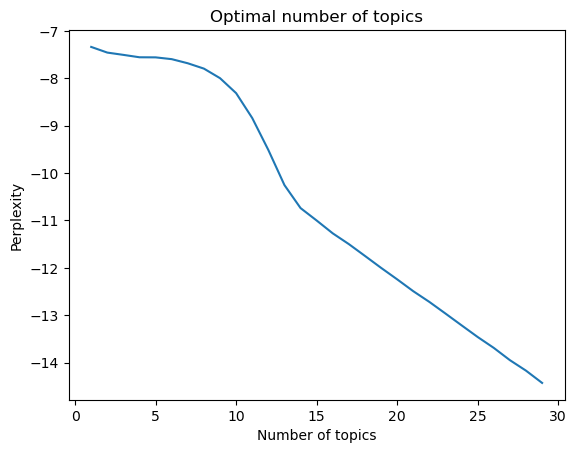

In [52]:
# find best nuber of topics with perplexity


n = 1
best_topics = 0
perplexity_best = 0
y = list()


while n < 30:
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)
    
    perplexity = lda_model.log_perplexity(corpus)
    y.append(perplexity)
   

    if perplexity < perplexity_best:
        perplexity_best = perplexity
        best_topics = n

    n += 1



x = list(range(1,30))

plt.plot(x, y)
plt.xlabel('Number of topics')
plt.ylabel('Perplexity')
plt.title('Optimal number of topics')
print('BEST NUMBER OF TOPICS: ', best_topics, 'Perplexity: ', perplexity_best)

We see that perplexity gets better the more topics we have. <br> This can be due to: <br> - Improved topic Resolution <br> - Reduced Ambiguity <br>- Better fit to data <br>  We try with coherence

BEST NUMBER OF TOPICS:  9 coherence:  0.5771521339329192


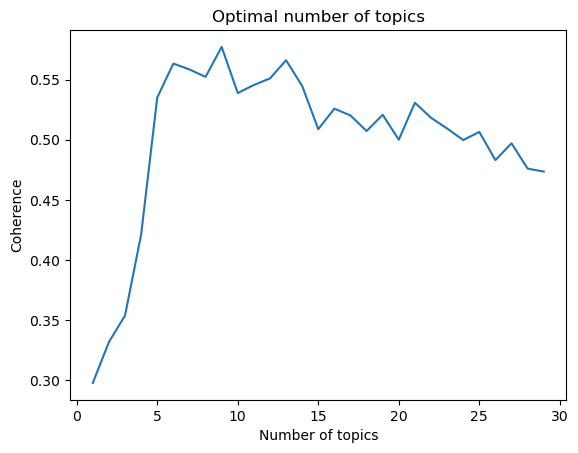

In [53]:
# Find best Coherence Score

n = 1
best_topics = 0
coherence_best = 0
y = list()

while n < 30:
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)
    
    coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    y.append(coherence_lda)
   

    if coherence_lda > coherence_best:
        coherence_best = coherence_lda
        best_topics = n

    n += 1

x = list(range(1,30))

plt.plot(x, y)
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Optimal number of topics')
print('BEST NUMBER OF TOPICS: ', best_topics, 'coherence: ', coherence_best)



In [96]:
lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=9, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

In [97]:

def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 30);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

get_lda_topics(lda_model, 9)

Topic # 01        Topic # 02            Topic # 03  \
0                 draw           problem                 money   
1                 evil          troubled                 state   
2              titular          entirely                  wood   
3         coproduction        ray_liotta                 light   
4            hollywood             bobby                banner   
5                issue              wave                  long   
6                 body          austrian                 raise   
7             invasion            brutal           gary_oldman   
8             survivor              fine        actionthriller   
9        panned_critic       drugaddicte                 grace   
10               ghost              sant               station   
11                rest           merritt                   pay   
12              middle              push                  walk   
13               magic       shakespeare              c_reilly   
14              memoir      coasttocoast                  mean   
15            computer             wever                 angel   
16           storyline  richard_dreyfuss                 clown   
17             instead        scientific               manager   
18            practice             chess     paramount_picture   
19               allow          homicide           directorial   
20                 era          shooting                  thor   
21              retell              sink             broadcast   
22  scarlett_johansson             sweep       actionadventure   
23         christopher          sadistic              football   
24                gift         policeman  dysfunctional_family   
25   universal_picture            closet             star_trek   
26          especially           culprit                 think   
27           seemingly          lawrence                  ride   
28             fashion           robocop               illegal   
29        championship          frank_oz                 lucky   

          Topic # 04    Topic # 05      Topic # 06           Topic # 07  \
0               turn          film       terrorist           journalist   
1         liveaction        direct       operation                power   
2             search          star            camp               parent   
3             origin         write         village                great   
4              giant          base           wolff                house   
5                 th      american       transform             addition   
6           musician        comedy          wonder                build   
7           universe        follow         unknown              wealthy   
8            compete       release           frame              teenage   
9             jungle         drama    mixed_review                   rd   
10       intelligent          name    teenage_girl                 much   
11         scientist       produce          cancer  supernatural_horror   
12            wilson         story        chemical               modern   
13  animation_studio    screenplay         program                  guy   
14              male          also           newly              history   
15            farmer        action           uncle                 trap   
16              wall         novel     grandmother                cover   
17              idea      thriller           rocky               number   
18         ed_skrein      romantic          hobbit              college   
19            knight       feature  interpretation                 grow   
20            rabbit           set       religious            interview   
21           contain          life        find_way                 trip   
22              gray        horror      instalment                stalk   
23             apart      festival            foot                royal   
24        additional          play           agree                 bomb   
25             

In [98]:
r= get_lda_topics(lda_model, 9)

result_lda_9_topics = r.to_csv('results_lda_9_topics.csv')

In [56]:
pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.397082  0.197232       1        1  77.033700
8     -0.176221 -0.365948       2        1  11.176822
6      0.085386  0.022351       3        1   3.204692
7      0.086915  0.023291       4        1   3.195923
2      0.085427  0.025561       5        1   1.717482
3      0.085624  0.025344       6        1   1.686683
0      0.080977  0.024805       7        1   1.056932
5      0.078701  0.024448       8        1   0.711469
1      0.070274  0.022916       9        1   0.216297, topic_info=          Term          Freq         Total Category  logprob  loglift
10        film  17851.000000  17851.000000  Default  30.0000  30.0000
292    produce   1936.000000   1936.000000  Default  29.0000  29.0000
8       direct   7477.000000   7477.000000  Default  28.0000  28.0000
18        star   6078.000000   6078.000000  Default  27.0000  27.0000
309     series    653.000000    653.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
2385    closet      0.626054      1.258264   Topic9  -6.4741   5.4382
2927   culprit      0.498532      1.131221   Topic9  -6.7019   5.3169
9258  lawrence      0.485968      1.117951   Topic9  -6.7274   5.3032
1818   robocop      0.477903      1.109898   Topic9  -6.7441   5.2937
3230  frank_oz      0.455197      1.087063   Topic9  -6.7928   5.2658

[313 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         1  0.999686           action
1886      5  0.964667  actionadventure
5617      5  0.966946   actionthriller
1355      3  0.993426         addition
4365      6  0.984713       additional
...     ...       ...              ...
2154      5  0.992905             wood
2485      4  0.989870  woody_harrelson
23        1  0.999934            write
700       1  0.999434            young
1617      4  0.997242           zombie

[290 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 7, 8, 3, 4, 1, 6, 2])

Most of the topics are clustered together, we want to seperate

Topic 1 (topic 5 in table) 77% of tokens

Check for better clustering

In [57]:
n = 2

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)





In [58]:
coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

Coherence: 0.3318147123826579 Number of topics: 2


In [59]:
pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.200562  0.0       1        1  87.804384
1     -0.200562  0.0       2        1  12.195616, topic_info=         Term          Freq         Total Category  logprob  loglift
10       film  15895.000000  15895.000000  Default  30.0000  30.0000
147      life    446.000000    446.000000  Default  29.0000  29.0000
8      direct   6658.000000   6658.000000  Default  28.0000  28.0000
18       star   5412.000000   5412.000000  Default  27.0000  27.0000
23      write   4221.000000   4221.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
972     focus     47.574505    155.394922   Topic2  -6.1757   0.9204
1053     tell     42.459315    113.232491   Topic2  -6.2894   1.1232
1444    early     38.248437     96.065425   Topic2  -6.3939   1.1832
350     world     36.946533    300.523429   Topic2  -6.4285   0.0080
1092  british     35.378127    155.803451   Topic2  -6.4719   0.6216

[111 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.999866    action
1567      1  0.048907  activist
1567      2  0.978149  activist
2791      1  0.018428       age
2791      2  0.976664       age
...     ...       ...       ...
504       1  0.016946       war
504       2  0.982849       war
350       1  0.878467     world
350       2  0.123119     world
23        1  0.999770     write

[143 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [60]:
n = 3

    

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)



Coherence: 0.35392303106122847 Number of topics: 3


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.300140  0.007557       1        1  80.102909
0      0.141202 -0.195609       2        1  10.788543
1      0.158938  0.188052       3        1   9.108548, topic_info=              Term          Freq         Total Category  logprob  loglift
10            film  16434.000000  16434.000000  Default  30.0000  30.0000
8           direct   6883.000000   6883.000000  Default  29.0000  29.0000
18            star   5596.000000   5596.000000  Default  28.0000  28.0000
23           write   4365.000000   4365.000000  Default  27.0000  27.0000
147           life    534.000000    534.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
453         murder     73.293572    197.669016   Topic3  -5.4516   1.4038
1970  biographical     64.119641    155.362082   Topic3  -5.5853   1.5109
1049        people     36.650227    145.463399   Topic3  -6.1447   1.0175
1053          tell     31.280820    118.773037   Topic3  -6.3031   1.0617
972          focus     31.556543    163.650925   Topic3  -6.2943   0.7500

[148 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
931       3  0.983791         account
0         1  0.998951          action
5617      3  0.985616  actionthriller
1040      2  0.993339           alien
157       1  0.999799            also
...     ...       ...             ...
749       2  0.339574           voice
504       3  0.995297             war
2137      1  0.026796           white
2137      2  0.964642           white
23        1  0.999955           write

[147 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [61]:
n = 4   

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.42117875419278755 Number of topics: 4


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.368179  0.007531       1        1  77.050065
3      0.112940 -0.252004       2        1   9.156807
0      0.136935  0.124079       3        1   7.071018
1      0.118304  0.120394       4        1   6.722109, topic_info=         Term          Freq         Total Category  logprob  loglift
10       film  16508.000000  16508.000000  Default  30.0000  30.0000
8      direct   6915.000000   6915.000000  Default  29.0000  29.0000
18       star   5621.000000   5621.000000  Default  28.0000  28.0000
23      write   4384.000000   4384.000000  Default  27.0000  27.0000
749     voice    344.000000    344.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
1127    stone     27.446816     39.969211   Topic4  -6.1300   2.3239
208   explore     34.728934     78.446917   Topic4  -5.8947   1.8849
1049   people     33.842586    146.742210   Topic4  -5.9206   1.2328
453    murder     33.014892    210.796308   Topic4  -5.9453   0.8458
1511   career     26.416413     94.081334   Topic4  -6.1683   1.4296

[176 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         1  0.999904           action
1         1  0.365166        adventure
1         2  0.634609        adventure
157       1  0.999564             also
24        1  0.999914         american
...     ...       ...              ...
1117      2  0.992520            visit
749       2  0.997696            voice
776       4  0.981572              win
2485      4  0.976931  woody_harrelson
23        1  0.999782            write

[162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [62]:
n = 5  

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.535052692144414 Number of topics: 5


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.385465  0.022017       1        1  82.026120
2      0.113614  0.161121       2        1   5.694964
3      0.068019 -0.258679       3        1   5.588169
1      0.106747  0.045795       4        1   3.538955
0      0.097086  0.029745       5        1   3.151792, topic_info=                     Term          Freq         Total Category  logprob  \
10                   film  16688.000000  16688.000000  Default  30.0000   
292               produce   1822.000000   1822.000000  Default  29.0000   
8                  direct   6990.000000   6990.000000  Default  28.0000   
18                   star   5682.000000   5682.000000  Default  27.0000   
254               picture    489.000000    489.000000  Default  26.0000   
...                   ...           ...           ...      ...      ...   
10816         emma_watson     14.734030     15.350687   Topic5  -5.9947   
4334                alive     14.540158     15.158117   Topic5  -6.0079   
627             estranged     14.244634     14.855967   Topic5  -6.0285   
629    laurence_fishburne     13.821782     14.426450   Topic5  -6.0586   
10424            brittany     15.092492     15.752973   Topic5  -5.9707   

       loglift  
10     30.0000  
292    29.0000  
8      28.0000  
18     27.0000  
254    26.0000  
...        ...  
10816   3.4162  
4334    3.4156  
627     3.4152  
629     3.4144  
10424   3.4144  

[198 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
3588      4  0.949064          accuse
0         1  0.998956          action
5617      4  0.972038  actionthriller
1         1  0.501815       adventure
1         3  0.494490       adventure
...     ...       ...             ...
1651      5  0.989686          wonder
3924      4  0.951933            word
23        1  0.999881           write
700       1  0.999314           young
1617      2  0.987907          zombie

[184 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 1])

In [63]:
n = 6  

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.5633048805639214 Number of topics: 6


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.405445 -0.028783       1        1  82.399716
3      0.045029  0.287278       2        1   5.331334
2      0.101717 -0.137924       3        1   4.528283
0      0.094222 -0.043548       4        1   3.146237
5      0.089246 -0.048435       5        1   2.904198
1      0.075232 -0.028588       6        1   1.690232, topic_info=            Term          Freq         Total Category  logprob  loglift
10          film  16883.000000  16883.000000  Default  30.0000  30.0000
292      produce   1857.000000   1857.000000  Default  29.0000  29.0000
8         direct   7071.000000   7071.000000  Default  28.0000  28.0000
254      picture    494.000000    494.000000  Default  27.0000  27.0000
18          star   5749.000000   5749.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
1929       queen      9.139499      9.784110   Topic6  -5.8491   4.0122
4054    resident      8.335451      8.955969   Topic6  -5.9412   4.0085
4664    civilian      8.270663      8.902733   Topic6  -5.9490   4.0067
1530   corporate      8.001551      8.624274   Topic6  -5.9821   4.0054
13554       leak      7.946484      8.580167   Topic6  -5.9890   4.0036

[225 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
1132      5  0.987679  accidentally
0         1  0.999213        action
1         1  0.471558     adventure
1         2  0.528287     adventure
7366      6  0.952868     aftermath
...     ...       ...           ...
199       2  0.971281        wilson
1201      5  0.951476         witch
1651      4  0.978172        wonder
23        1  0.999946         write
1617      3  0.984166        zombie

[208 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 6, 2])

In [64]:
n = 7 

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.5584370057699425 Number of topics: 7


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.422416 -0.036053       1        1  81.080179
6     -0.097904 -0.184421       2        1   5.038180
2     -0.090129 -0.059146       3        1   4.859548
3     -0.028821  0.277361       4        1   4.213638
0     -0.071529  0.001980       5        1   1.844632
5     -0.068871  0.000874       6        1   1.664946
1     -0.065161 -0.000595       7        1   1.298877, topic_info=          Term          Freq         Total Category  logprob  loglift
10        film  17137.000000  17137.000000  Default  30.0000  30.0000
292    produce   1897.000000   1897.000000  Default  29.0000  29.0000
8       direct   7178.000000   7178.000000  Default  28.0000  28.0000
18        star   5835.000000   5835.000000  Default  27.0000  27.0000
254    picture    510.000000    510.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
18094   himesh      9.207287      9.837293   Topic7  -5.5784   4.2775
2962      wave      8.679471      9.307212   Topic7  -5.6374   4.2738
4697    hidden      8.451559      9.080118   Topic7  -5.6640   4.2719
5321   fashion      8.261953      8.884932   Topic7  -5.6867   4.2710
3387   spencer      8.266399      8.889903   Topic7  -5.6862   4.2710

[253 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         1  0.999143          action
5617      3  0.983969  actionthriller
1355      2  0.985751        addition
1         1  0.535471       adventure
1         4  0.461002       adventure
...     ...       ...             ...
1481      2  0.994973         wealthy
5013      7  0.983293           wolff
1651      5  0.975594          wonder
23        1  0.999829           write
1617      3  0.988287          zombie

[236 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 3, 4, 1, 6, 2])

In [65]:
n = 8  

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.5522280712567763 Number of topics: 8


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.432806 -0.020851       1        1  81.247785
7      0.077021  0.081534       2        1   4.452781
3      0.031093  0.272755       3        1   3.808000
6      0.076572 -0.175319       4        1   3.662247
2      0.070356 -0.086379       5        1   3.098394
0      0.062479 -0.028019       6        1   1.583629
5      0.060534 -0.023982       7        1   1.349960
1      0.054751 -0.019739       8        1   0.797203, topic_info=                  Term          Freq         Total Category  logprob  loglift
10                film  17424.000000  17424.000000  Default  30.0000  30.0000
8               direct   7298.000000   7298.000000  Default  29.0000  29.0000
18                star   5933.000000   5933.000000  Default  28.0000  28.0000
749              voice    316.000000    316.000000  Default  27.0000  27.0000
254            picture    544.000000    544.000000  Default  26.0000  26.0000
...                ...           ...           ...      ...      ...      ...
15793   ben_mendelsohn      5.953161      6.587927   Topic8  -5.5263   4.7305
1800          austrian      5.966178      6.603049   Topic8  -5.5241   4.7304
1230            vision      5.933945      6.567943   Topic8  -5.5295   4.7303
2555   vincent_onofrio      5.785083      6.418996   Topic8  -5.5550   4.7278
3284           robbery      5.767679      6.401738   Topic8  -5.5580   4.7275

[285 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
0          1  0.999246       action
1          1  0.664330    adventure
1          3  0.337172    adventure
333        5  0.975261          air
4334       7  0.966714        alive
...      ...       ...          ...
287        8  0.979625      witness
1651       6  0.953754       wonder
23         1  0.999976        write
17733      6  0.991076  zazie_beetz
1617       5  0.988042       zombie

[267 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 4, 7, 3, 1, 6, 2])

In [66]:
n =9 

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.5771521339329192 Number of topics: 9


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.397082  0.197232       1        1  77.033700
8     -0.176221 -0.365948       2        1  11.176822
6      0.085386  0.022351       3        1   3.204692
7      0.086915  0.023291       4        1   3.195923
2      0.085427  0.025561       5        1   1.717482
3      0.085624  0.025344       6        1   1.686683
0      0.080977  0.024805       7        1   1.056932
5      0.078701  0.024448       8        1   0.711469
1      0.070274  0.022916       9        1   0.216297, topic_info=          Term          Freq         Total Category  logprob  loglift
10        film  17851.000000  17851.000000  Default  30.0000  30.0000
292    produce   1936.000000   1936.000000  Default  29.0000  29.0000
8       direct   7477.000000   7477.000000  Default  28.0000  28.0000
18        star   6078.000000   6078.000000  Default  27.0000  27.0000
309     series    653.000000    653.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
2385    closet      0.626054      1.258264   Topic9  -6.4741   5.4382
2927   culprit      0.498532      1.131221   Topic9  -6.7019   5.3169
9258  lawrence      0.485968      1.117951   Topic9  -6.7274   5.3032
1818   robocop      0.477903      1.109898   Topic9  -6.7441   5.2937
3230  frank_oz      0.455197      1.087063   Topic9  -6.7928   5.2658

[313 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         1  0.999686           action
1886      5  0.964667  actionadventure
5617      5  0.966946   actionthriller
1355      3  0.993426         addition
4365      6  0.984713       additional
...     ...       ...              ...
2154      5  0.992905             wood
2485      4  0.989870  woody_harrelson
23        1  0.999934            write
700       1  0.999434            young
1617      4  0.997242           zombie

[290 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 7, 8, 3, 4, 1, 6, 2])

In [67]:
n = 10  

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.5388194505280668 Number of topics: 10


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.438876  0.148512       1        1  79.792369
8     -0.125472 -0.385704       2        1   9.055383
6      0.065491  0.033389       3        1   2.659950
7      0.071531  0.034791       4        1   2.493342
2      0.072926  0.034234       5        1   2.224001
3      0.068381  0.011442       6        1   1.734227
0      0.074996  0.032905       7        1   0.910918
5      0.071087  0.030423       8        1   0.391567
9      0.070045  0.030051       9        1   0.387336
1      0.069891  0.029957      10        1   0.350907, topic_info=            Term          Freq         Total Category  logprob  loglift
10          film  18419.000000  18419.000000  Default  30.0000  30.0000
8         direct   7715.000000   7715.000000  Default  29.0000  29.0000
309       series    710.000000    710.000000  Default  28.0000  28.0000
18          star   6272.000000   6272.000000  Default  27.0000  27.0000
4      character    563.000000    563.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
5152        pack      1.734466      2.340922  Topic10  -5.9389   5.3526
1443        cher      1.725140      2.331707  Topic10  -5.9443   5.3511
2459     neonoir      1.678662      2.285176  Topic10  -5.9716   5.3440
4795  separation      1.595745      2.202240  Topic10  -6.0223   5.3303
427        sweep      1.148888      1.755421  Topic10  -6.3509   5.2285

[342 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
931       6  0.977139   account
0         1  0.999257    action
1567      9  0.897554  activist
2615      7  0.905135  activity
1355      3  0.988760  addition
...     ...       ...       ...
287      10  0.905759   witness
2937     10  0.927504    wright
23        1  0.999967     write
700       1  0.999093     young
1617      5  0.994535    zombie

[322 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 7, 8, 3, 4, 1, 6, 10, 2])

In [68]:
n = 11  

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.5455035892368086 Number of topics: 11


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.475640 -0.092134       1        1  83.253458
8     -0.067656  0.385279       2        1   5.423031
10     0.042722 -0.031265       3        1   2.599296
7      0.047695 -0.033585       4        1   2.560142
6      0.060369 -0.036660       5        1   1.688841
2      0.065252 -0.037120       6        1   1.326046
3      0.061372 -0.018189       7        1   1.266103
5      0.067697 -0.035189       8        1   0.659240
0      0.067194 -0.035001       9        1   0.612418
1      0.066324 -0.033899      10        1   0.409722
9      0.064671 -0.032237      11        1   0.201704, topic_info=              Term          Freq         Total Category  logprob  loglift
10            film  19472.000000  19472.000000  Default  30.0000  30.0000
254        picture    523.000000    523.000000  Default  29.0000  29.0000
8           direct   8156.000000   8156.000000  Default  28.0000  28.0000
749          voice    403.000000    403.000000  Default  27.0000  27.0000
18            star   6630.000000   6630.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
10612       assist      0.018246      0.665588  Topic11  -9.9398   2.6094
16719  fifty_shade      0.019723      0.730613  Topic11  -9.8619   2.5940
9592          zack      0.018245      0.675331  Topic11  -9.9398   2.5948
7981       woodley      0.018361      0.692456  Topic11  -9.9334   2.5761
16320         elsa      0.018342      0.691558  Topic11  -9.9345   2.5764

[373 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         1  0.999879           action
1886      8  0.977413  actionadventure
2615      9  0.948676         activity
1355      4  0.992355         addition
1         1  0.777914        adventure
...     ...       ...              ...
1201      8  0.936400            witch
2485      4  0.995002  woody_harrelson
9773      4  0.982577   world_premiere
23        1  0.999802            write
1617      3  0.986271           zombie

[330 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 11, 8, 7, 3, 4, 6, 1, 2, 10])

In [69]:
n = 12  

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.5509663794124628 Number of topics: 12


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.442523 -0.236893       1        1  77.619019
8     -0.267434  0.358210       2        1  10.815258
7      0.051230 -0.007644       3        1   2.167907
10     0.052259 -0.007925       4        1   2.032605
2      0.054094 -0.008465       5        1   2.030830
6      0.059752 -0.009996       6        1   1.739206
3      0.078053 -0.013784       7        1   0.961584
0      0.082020 -0.014461       8        1   0.708443
11     0.081719 -0.014468       9        1   0.651810
5      0.082470 -0.014533      10        1   0.624510
9      0.083836 -0.014904      11        1   0.438998
1      0.084523 -0.015137      12        1   0.209830, topic_info=                Term          Freq         Total Category  logprob  loglift
10              film  20698.000000  20698.000000  Default  30.0000  30.0000
292          produce   2240.000000   2240.000000  Default  29.0000  29.0000
8             direct   8669.000000   8669.000000  Default  28.0000  28.0000
309           series    763.000000    763.000000  Default  27.0000  27.0000
18              star   7048.000000   7048.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
18232    smokejumper      0.018353      0.694374  Topic12  -9.9734   2.5334
12853  michelle_yeoh      0.018292      0.695217  Topic12  -9.9767   2.5289
4697          hidden      0.018567      0.709369  Topic12  -9.9618   2.5236
11983   andy_fickman      0.018352      0.702148  Topic12  -9.9734   2.5223
3528          entity      0.018409      0.715771  Topic12  -9.9703   2.5061

[404 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
3762      7  0.981507   academy_award
1454     11  0.919855  academy_awards
0         1  0.999094          action
5617      5  0.991174  actionthriller
1567     11  0.974895        activist
...     ...       ...             ...
1651      6  0.973574          wonder
2154      5  0.987370            wood
23        1  0.999915           write
700       1  0.999293           young
1617      4  0.980756          zombie

[368 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 8, 11, 3, 7, 4, 1, 12, 6, 10, 2])

In [70]:
n = 13  

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.5660889264490641 Number of topics: 13


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.462515  0.231117       1        1  78.571473
8      0.269431 -0.359584       2        1   9.804042
10    -0.006567 -0.002319       3        1   3.161908
7     -0.022542  0.003733       4        1   2.556185
6     -0.069981  0.013405       5        1   1.096804
2     -0.070030  0.013425       6        1   1.083587
3     -0.071934  0.013664       7        1   0.996844
0     -0.080547  0.014421       8        1   0.591499
12    -0.080849  0.014452       9        1   0.551975
11    -0.080912  0.014429      10        1   0.544270
9     -0.080546  0.014447      11        1   0.538516
5     -0.083783  0.014438      12        1   0.303467
1     -0.084255  0.014372      13        1   0.199430, topic_info=                Term          Freq         Total Category  logprob  loglift
10              film  21862.000000  21862.000000  Default  30.0000  30.0000
292          produce   2384.000000   2384.000000  Default  29.0000  29.0000
8             direct   9157.000000   9157.000000  Default  28.0000  28.0000
309           series    812.000000    812.000000  Default  27.0000  27.0000
18              star   7444.000000   7444.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
4405       yesterday      0.017304      0.681935  Topic13  -9.9814   2.5435
2401         fanatic      0.017321      0.682713  Topic13  -9.9804   2.5433
18208           jojo      0.017437      0.687917  Topic13  -9.9738   2.5424
12897  evan_goldberg      0.017333      0.683684  Topic13  -9.9797   2.5426
8402       classmate      0.017335      0.690724  Topic13  -9.9796   2.5325

[437 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
1509      7  0.987885              act
0         1  0.999557           action
1886      9  0.942664  actionadventure
2615      8  0.921232         activity
2175     10  0.977378            addam
...     ...       ...              ...
2485      3  0.984930  woody_harrelson
23        1  0.999868            write
700       1  0.999211            young
1981      9  0.960045            youth
1617      3  0.993231           zombie

[396 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 11, 8, 7, 3, 4, 1, 13, 12, 10, 6, 2])

In [71]:
n = 14  

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.5446830598620643 Number of topics: 14


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.472147  0.224709       1        1  76.368726
8      0.260153 -0.370407       2        1   9.264691
10    -0.025935  0.004939       3        1   2.323947
13    -0.026629  0.005117       4        1   2.206139
7     -0.041888  0.008745       5        1   1.886472
3     -0.056063  0.013097       6        1   1.385323
2     -0.054821  0.011443       7        1   1.370879
6     -0.063428  0.012905       8        1   1.171804
9     -0.071186  0.014139       9        1   0.955338
11    -0.074529  0.014592      10        1   0.764743
12    -0.076812  0.014838      11        1   0.749011
0     -0.076650  0.014848      12        1   0.724252
5     -0.080859  0.015370      13        1   0.460250
1     -0.083498  0.015665      14        1   0.368425, topic_info=           Term          Freq         Total Category  logprob  loglift
10         film  22420.000000  22420.000000  Default  30.0000  30.0000
8        direct   9391.000000   9391.000000  Default  29.0000  29.0000
309      series    835.000000    835.000000  Default  28.0000  28.0000
18         star   7634.000000   7634.000000  Default  27.0000  27.0000
246      sequel    802.000000    802.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
2120    lawsuit      1.817449      2.570281  Topic14  -5.9409   5.2571
427       sweep      1.556928      2.309760  Topic14  -6.0956   5.2093
2117       file      1.531676      2.284507  Topic14  -6.1120   5.2039
2777  backstage      0.991563      1.744394  Topic14  -6.5468   5.0388
3230   frank_oz      0.982103      1.734933  Topic14  -6.5564   5.0347

[462 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
1838     13  0.463455           absent
2826     12  0.897875          abusive
3762      6  0.959544    academy_award
1132      8  0.986351     accidentally
931       4  0.991618          account
...     ...       ...              ...
2485      3  0.985967  woody_harrelson
2937     14  0.862803           wright
23        1  0.999847            write
700       1  0.999201            young
1617      7  0.981303           zombie

[440 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 11, 14, 8, 4, 3, 7, 10, 12, 13, 1, 6, 2])

In [72]:
n = 15  

lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.5087798051999909 Number of topics: 15


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.518029  0.119478       1        1  79.550997
8     -0.116715 -0.400235       2        1   5.571331
14     0.007663  0.006745       3        1   2.264181
7      0.018799  0.012814       4        1   2.142737
13     0.031236  0.017880       5        1   1.756334
2      0.036728  0.019780       6        1   1.618440
10     0.035730  0.019370       7        1   1.605073
6      0.053325  0.024357       8        1   1.040475
3      0.053634  0.024328       9        1   0.997964
0      0.060974  0.025587      10        1   0.756243
9      0.062412  0.025821      11        1   0.750074
12     0.063312  0.025920      12        1   0.734976
1      0.065830  0.026075      13        1   0.581237
11     0.069928  0.026285      14        1   0.446223
5      0.075173  0.025794      15        1   0.183713, topic_info=                Term          Freq         Total Category  logprob  loglift
10              film  22442.000000  22442.000000  Default  30.0000  30.0000
309           series    848.000000    848.000000  Default  29.0000  29.0000
8             direct   9400.000000   9400.000000  Default  28.0000  28.0000
749            voice    431.000000    431.000000  Default  27.0000  27.0000
18              star   7642.000000   7642.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
17925          drago      0.015522      0.765210  Topic15 -10.0080   2.4016
3872          muppet      0.015542      0.766269  Topic15 -10.0067   2.4015
13833          creed      0.015518      0.765235  Topic15 -10.0082   2.4014
3244            gold      0.015557      0.767971  Topic15 -10.0058   2.4003
6358   found_footage      0.015553      0.767873  Topic15 -10.0060   2.4002

[483 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
921      14  0.750231             able
1838     15  0.662278           absent
2826     10  0.892304          abusive
2746     11  0.936225         accident
1132      8  0.987708     accidentally
...     ...       ...              ...
2154      7  0.991570             wood
2485      4  0.985143  woody_harrelson
23        1  0.999880            write
1218      2  0.989694           writer
1617      7  0.995584           zombie

[436 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 15, 8, 14, 3, 11, 7, 4, 1, 10, 13, 2, 12, 6])

We see that when we reach 9 topics or more, most of the topics are clustered together. We want the topics to be seperated. It seems that 5 topics with a coherence score of  0.535052692144414 gives better clustering while coherence score still is OK

In [105]:
lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=idword,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           eta = 'auto',
                                           per_word_topics=True)

In [106]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 30);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

get_lda_topics(lda_model, 5)

Topic # 01         Topic # 02          Topic # 03            Topic # 04  \
0        titular        investigate         documentary                 voice   
1   coproduction              point          television               animate   
2      hollywood               grow          journalist       computeranimate   
3          space          challenge              zombie             adventure   
4          issue     actionthriller               money               produce   
5         reboot            village           spiderman               picture   
6           body        transformer    pictures_release         international   
7       survival             sexual             history             animation   
8       invasion           designer       found_footage                  turn   
9     stephen_ke           retrieve                park                studio   
10         angry             report               state               fantasy   
11       destroy            bombing  distributed_warner            distribute   
12      survivor           dolemite               light               musical   
13       replace          goldfinch             narrate            liveaction   
14   predecessor            problem              origin                   fox   
15     scientist            patient        marvel_comic        studios_motion   
16          rest            unknown                 air                search   
17       chapter           navigate              season                disney   
18        remote                ill           interview             operation   
19        memoir           troubled             creator                 giant   
20      computer               mind                long                arrive   
21        wonder             accuse               raise               ancient   
22     storyline             invite              system  dreamworks_animation   
23         happy     rosario_dawson    distributed_sony              universe   
24        museum       mixed_review                bomb                  mile   
25          lily             partly       charlie_angel                sergio   
26      brittany  quentin_tarantino             israeli                 royal   
27   emma_watson       teenage_girl                 kid      computeranimated   
28         alive             letter              deadly                embark   
29     estranged             cancer           superhero       internationally   

    Topic # 05  
0         film  
1       direct  
2         star  
3        write  
4         base  
5     american  
6       comedy  
7       follow  
8      release  
9      produce  
10       drama  
11        name  
12       story  
13  screenplay  
14        also  
15      action  
16       novel  
17     feature  
18    thriller  
19       first  
20    romantic  
21      series  
22      sequel  
23         set  
24        life  
25      horror  
26   character  
27    festival  
28        play  
29        role

In [107]:
r= get_lda_topics(lda_model, 5)

result_lda_5_topics = r.to_csv('results_lda_5_topics.csv')

#### ANOTHER LDA MODEL, LdaMulticore

BEST NUMBER OF TOPICS:  6 coherence:  0.3390852737538949


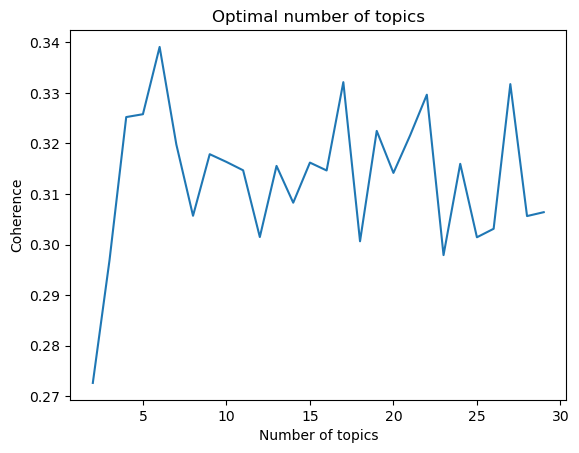

In [77]:
# Find best Coherence Score

n = 2
best_topics = 0
coherence_best = 0
y = list()

while n < 30:
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)
    
    coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    y.append(coherence_lda)
   

    if coherence_lda > coherence_best:
        coherence_best = coherence_lda
        best_topics = n

    n += 1

x = list(range(2,30))

plt.plot(x, y)
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Optimal number of topics')
print('BEST NUMBER OF TOPICS: ', best_topics, 'coherence: ', coherence_best)

We see that coherence is lower. A score of 0.3 is bad and a score of 0.4 is low

In [78]:
n = 3

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)


coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.2987829890081793 Number of topics: 3


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.070518  0.061185       1        1  50.204967
0      0.021502 -0.087603       2        1  29.037180
1     -0.092020  0.026418       3        1  20.757853, topic_info=          Term          Freq         Total Category  logprob  loglift
18        star   5309.000000   5309.000000  Default  30.0000  30.0000
74      follow   1702.000000   1702.000000  Default  29.0000  29.0000
8       direct   6523.000000   6523.000000  Default  28.0000  28.0000
10        film  15426.000000  15426.000000  Default  27.0000  27.0000
729   festival    516.000000    516.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
147       life    116.793709    577.782840   Topic3  -5.8094  -0.0265
15        name    126.560585   1278.227798   Topic3  -5.7291  -0.7403
4    character    102.489946    502.087904   Topic3  -5.9400  -0.0168
148        man     97.277355    416.401077   Topic3  -5.9922   0.1182
26       novel     97.883255    778.265636   Topic3  -5.9860  -0.5010

[263 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3688      2  0.968154       abortion
3762      1  0.981447  academy_award
4646      1  0.976679        acquire
0         1  0.501946         action
0         2  0.187145         action
...     ...       ...            ...
23        2  0.307322          write
23        3  0.195568          write
700       1  0.269882          young
700       2  0.545162          young
700       3  0.186219          young

[367 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [79]:
n = 4

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)


coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.3252128613886264 Number of topics: 4


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.011377 -0.036970       1        1  45.150973
0     -0.008070 -0.085864       2        1  20.278991
3      0.111251  0.050051       3        1  20.262413
1     -0.091804  0.072783       4        1  14.307623, topic_info=            Term          Freq         Total Category  logprob  loglift
10          film  15623.000000  15623.000000  Default  30.0000  30.0000
18          star   5382.000000   5382.000000  Default  29.0000  29.0000
292      produce   1587.000000   1587.000000  Default  28.0000  28.0000
8         direct   6604.000000   6604.000000  Default  27.0000  27.0000
74        follow   1701.000000   1701.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
292      produce    111.593024   1587.438885   Topic4  -5.4828  -0.7106
66   documentary     64.696134    310.881007   Topic4  -6.0280   0.3747
26         novel     80.250687    790.411553   Topic4  -5.8125  -0.3430
15          name     88.670585   1265.906471   Topic4  -5.7127  -0.7142
147         life     72.093610    586.754085   Topic4  -5.9197  -0.1523

[335 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
3688       3  0.972602       abortion
3762       1  0.991670  academy_award
4646       1  0.964805        acquire
0          1  0.445733         action
0          2  0.157683         action
...      ...       ...            ...
700        1  0.186924          young
700        2  0.309680          young
700        3  0.398958          young
700        4  0.103227          young
17733      3  0.933700    zazie_beetz

[507 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [80]:
n = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)


coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.3212659783077987 Number of topics: 5


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.020328  0.033828       1        1  62.367775
2     -0.036826  0.114695       2        1  15.708959
3     -0.122010 -0.057773       3        1  10.941380
0      0.041189 -0.107286       4        1   6.620175
1      0.137976  0.016536       5        1   4.361712, topic_info=       Term          Freq         Total Category  logprob  loglift
10     film  15815.000000  15815.000000  Default  30.0000  30.0000
8    direct   6747.000000   6747.000000  Default  29.0000  29.0000
18     star   5549.000000   5549.000000  Default  28.0000  28.0000
23    write   4232.000000   4232.000000  Default  27.0000  27.0000
74   follow   1750.000000   1750.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
151     set     18.892400    556.672582   Topic5  -6.0710  -0.2509
438    plot     18.158800    383.404934   Topic5  -6.1106   0.0824
246  sequel     18.215407    598.124312   Topic5  -6.1075  -0.3592
140  family     17.873159    444.853346   Topic5  -6.1264  -0.0821
0    action     17.332007    889.474933   Topic5  -6.1572  -0.8058

[393 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
12536      4  0.949051  abbie_cornish
3688       3  0.901926       abortion
3688       5  0.053054       abortion
0          1  0.862306         action
0          2  0.077574         action
...      ...       ...            ...
23         4  0.061663          write
23         5  0.030713          write
700        1  0.836946          young
700        3  0.129324          young
700        4  0.034161          young

[664 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 1, 2])

In [81]:
n = 6

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)


coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.3382539271645914 Number of topics: 6


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.022028  0.054221       1        1  61.650029
2     -0.049675  0.079113       2        1  13.775240
3     -0.118269 -0.106874       3        1   8.582628
5     -0.023339  0.012607       4        1   7.035310
0      0.086202  0.055143       5        1   5.371786
1      0.127108 -0.094209       6        1   3.585006, topic_info=           Term          Freq         Total Category  logprob  loglift
10         film  15790.000000  15790.000000  Default  30.0000  30.0000
8        direct   6746.000000   6746.000000  Default  29.0000  29.0000
18         star   5533.000000   5533.000000  Default  28.0000  28.0000
23        write   4237.000000   4237.000000  Default  27.0000  27.0000
74       follow   1715.000000   1715.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
6        comedy     22.346816   1824.809573   Topic6  -5.7070  -1.0741
147        life     18.345599    591.148670   Topic6  -5.9043  -0.1443
535        find     16.802074    299.217444   Topic6  -5.9921   0.4487
239      horror     17.036824    500.460566   Topic6  -5.9783  -0.0517
129  screenplay     16.764662    893.531616   Topic6  -5.9944  -0.6475

[468 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3688      3  0.899193  abortion
3688      6  0.059946  abortion
5337      5  0.885814      acre
0         1  0.835708    action
0         2  0.048825    action
...     ...       ...       ...
23        6  0.022181     write
700       1  0.726153     young
700       3  0.063922     young
700       4  0.173868     young
700       5  0.033239     young

[814 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 6, 1, 2])

In [82]:
n = 7

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)


coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.3232914512747751 Number of topics: 7


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.027724 -0.056271       1        1  53.891332
2      0.030207 -0.109568       2        1  13.261354
6      0.026257 -0.076438       3        1  12.146969
3      0.127337  0.109439       4        1   7.712371
5      0.021273  0.045820       5        1   5.673110
0     -0.086462  0.078505       6        1   4.058558
1     -0.146335  0.008513       7        1   3.256305, topic_info=         Term          Freq         Total Category  logprob  loglift
10       film  15636.000000  15636.000000  Default  30.0000  30.0000
8      direct   6680.000000   6680.000000  Default  29.0000  29.0000
18       star   5482.000000   5482.000000  Default  28.0000  28.0000
23      write   4209.000000   4209.000000  Default  27.0000  27.0000
2        base   2250.000000   2250.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
49   romantic     16.223548    685.581668   Topic7  -5.9310  -0.3192
6      comedy     15.916155   1782.832109   Topic7  -5.9501  -1.2940
151       set     14.057436    566.271518   Topic7  -6.0743  -0.2713
157      also     14.317331    912.776712   Topic7  -6.0560  -0.7304
0      action     13.534058    880.272329   Topic7  -6.1123  -0.7504

[548 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3688      5  0.979405       abortion
3762      1  0.173912  academy_award
3762      2  0.782603  academy_award
6409      2  0.905749        achieve
6409      3  0.064696        achieve
...     ...       ...            ...
700       4  0.077772          young
700       5  0.147767          young
700       6  0.012962          young
2864      5  0.871786           zone
2864      7  0.087179           zone

[1026 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 7, 4, 6, 1, 2])

In [83]:
n = 8

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)


coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.30537852403475463 Number of topics: 8


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.070130  0.007521       1        1  50.060442
7      0.062896  0.017221       2        1  13.905327
2      0.088937 -0.051650       3        1  10.464116
6      0.053039  0.050057       4        1   8.901858
5     -0.001677 -0.056412       5        1   5.468202
3     -0.063949 -0.103788       6        1   4.934224
0     -0.049439  0.140419       7        1   4.229928
1     -0.159936 -0.003368       8        1   2.035902, topic_info=         Term          Freq         Total Category  logprob  loglift
10       film  15696.000000  15696.000000  Default  30.0000  30.0000
8      direct   6673.000000   6673.000000  Default  29.0000  29.0000
18       star   5463.000000   5463.000000  Default  28.0000  28.0000
23      write   4211.000000   4211.000000  Default  27.0000  27.0000
74     follow   1744.000000   1744.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
421     night     10.304159    162.701486   Topic8  -5.9153   1.1349
2481     game      9.405927    100.417382   Topic8  -6.0065   1.5262
453    murder      9.792615    225.326443   Topic8  -5.9662   0.7583
341   feature     10.737148    826.119758   Topic8  -5.8741  -0.4488
26      novel      9.765287    801.258982   Topic8  -5.9690  -0.5131

[603 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
12536      7  0.972663       abbie_cornish
3688       1  0.981045            abortion
1454       3  0.886885      academy_awards
351        6  0.908978  academy_awardwinne
3418       2  0.920055             acclaim
...      ...       ...                 ...
700        2  0.023277               young
700        4  0.129317               young
700        5  0.155180               young
700        6  0.064658               young
700        7  0.023277               young

[1121 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 3, 7, 6, 4, 1, 2])

In [84]:
n = 9

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)


coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.3136017833284329 Number of topics: 9


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.088634 -0.021082       1        1  39.109877
8     -0.084454  0.074848       2        1  19.426061
7     -0.084962 -0.035929       3        1  12.503388
2     -0.050652 -0.088742       4        1   9.193893
6     -0.046256 -0.034216       5        1   8.078975
5      0.044165  0.064991       6        1   3.510668
3      0.068049  0.151711       7        1   3.315305
0      0.053302 -0.023993       8        1   3.054014
1      0.189443 -0.087588       9        1   1.807818, topic_info=             Term          Freq         Total Category  logprob  loglift
10           film  15612.000000  15612.000000  Default  30.0000  30.0000
8          direct   6662.000000   6662.000000  Default  29.0000  29.0000
18           star   5472.000000   5472.000000  Default  28.0000  28.0000
23          write   4210.000000   4210.000000  Default  27.0000  27.0000
74         follow   1737.000000   1737.000000  Default  26.0000  26.0000
..            ...           ...           ...      ...      ...      ...
120       release     10.959494   1545.364627   Topic9  -5.7348  -0.9358
64       thriller      9.781976    652.880564   Topic9  -5.8485  -0.1878
444          year      9.013995    265.385014   Topic9  -5.9302   0.6306
0          action      9.550081    862.186028   Topic9  -5.8725  -0.4899
694  relationship      8.688215    157.399170   Topic9  -5.9670   1.1162

[678 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
3688      6  0.977089        abortion
1454      4  0.903556  academy_awards
4849      6  0.832106          access
3418      3  0.925072         acclaim
5337      8  0.873558            acre
...     ...       ...             ...
700       5  0.141659           young
700       6  0.108176           young
700       7  0.018029           young
700       8  0.023181           young
5648      5  0.901555       zellweger

[1328 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 8, 3, 7, 6, 4, 1, 2])

In [85]:
n = 10

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)


coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.3227374205263966 Number of topics: 10


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.086160 -0.005040       1        1  38.925393
8      0.083693  0.038761       2        1  18.106693
7      0.088192  0.010131       3        1  12.897700
2      0.083903  0.058975       4        1   8.810015
6      0.062945 -0.059956       5        1   7.683701
3     -0.037648 -0.001940       6        1   3.174808
5     -0.026131 -0.081440       7        1   3.130227
0     -0.079443 -0.076161       8        1   2.799728
9     -0.121269  0.169946       9        1   2.341895
1     -0.140401 -0.053276      10        1   2.129839, topic_info=          Term          Freq         Total Category  logprob  loglift
10        film  15718.000000  15718.000000  Default  30.0000  30.0000
8       direct   6691.000000   6691.000000  Default  29.0000  29.0000
18        star   5479.000000   5479.000000  Default  28.0000  28.0000
23       write   4185.000000   4185.000000  Default  27.0000  27.0000
74      follow   1727.000000   1727.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
0       action     12.598412    877.690210  Topic10  -5.7594  -0.3946
297       dead      9.707088     88.450715  Topic10  -6.0201   1.6395
453     murder     10.264158    228.734643  Topic10  -5.9643   0.7452
4    character     10.593492    502.070451  Topic10  -5.9327  -0.0094
157       also      9.891573    916.006308  Topic10  -6.0012  -0.6792

[754 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
3688      6  0.945954        abortion
1454      4  0.969652  academy_awards
3418      3  0.978664         acclaim
0         1  0.598161          action
0         2  0.238125          action
...     ...       ...             ...
700       9  0.015596           young
700      10  0.015596           young
2864      2  0.098829            zone
2864      5  0.098829            zone
2864      9  0.790630            zone

[1493 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 8, 3, 7, 4, 6, 1, 10, 2])

In [86]:
n = 11

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)


coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.3154455595692039 Number of topics: 11


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.077298 -0.011515       1        1  34.718293
8     -0.087716 -0.043472       2        1  16.422646
10    -0.063161  0.010474       3        1  10.663443
7     -0.076525  0.032473       4        1  10.326743
2     -0.079517  0.091515       5        1   8.158625
6     -0.052845  0.008178       6        1   7.015967
5      0.052088 -0.097879       7        1   3.135595
0      0.066960 -0.119151       8        1   3.127542
3      0.067631 -0.039347       9        1   3.009642
9      0.081699  0.075541      10        1   2.009433
1      0.168684  0.093184      11        1   1.412070, topic_info=             Term          Freq         Total Category  logprob  loglift
10           film  15622.000000  15622.000000  Default  30.0000  30.0000
8          direct   6630.000000   6630.000000  Default  29.0000  29.0000
18           star   5434.000000   5434.000000  Default  28.0000  28.0000
23          write   4180.000000   4180.000000  Default  27.0000  27.0000
74         follow   1739.000000   1739.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
66    documentary      9.774564    294.970507  Topic11  -5.6022   0.8530
2252        billy      7.319340     60.317578  Topic11  -5.8914   2.1510
208       explore      7.374048     73.688795  Topic11  -5.8840   1.9582
6          comedy      9.422765   1763.803444  Topic11  -5.6388  -0.9720
64       thriller      8.320993    638.626657  Topic11  -5.7632  -0.0804

[837 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
3688      7  0.935517            abortion
1454      5  0.917329      academy_awards
351      11  0.931770  academy_awardwinne
4849      3  0.931377              access
0         1  0.592252              action
...     ...       ...                 ...
700       9  0.068957               young
700      10  0.029174               young
2864      3  0.102710                zone
2864     10  0.718969                zone
2864     11  0.102710                zone

[1767 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 11, 8, 3, 7, 6, 1, 4, 10, 2])

In [87]:
n = 12

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)


coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.301338156609607 Number of topics: 12


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.099690  0.025239       1        1  34.924297
8     -0.102722 -0.084390       2        1  15.950362
10    -0.092331  0.014771       3        1  11.295442
7     -0.078463  0.005989       4        1   9.750694
2     -0.072490  0.073074       5        1   9.012748
6     -0.063264  0.056873       6        1   6.220364
5      0.046466  0.025664       7        1   2.896199
0      0.036624 -0.039619       8        1   2.652730
3      0.036974 -0.160965       9        1   2.465240
9      0.101466  0.058548      10        1   2.012718
1      0.162291  0.046832      11        1   1.478269
11     0.125139 -0.022016      12        1   1.340937, topic_info=        Term          Freq         Total Category  logprob  loglift
10      film  15697.000000  15697.000000  Default  30.0000  30.0000
8     direct   6686.000000   6686.000000  Default  29.0000  29.0000
18      star   5485.000000   5485.000000  Default  28.0000  28.0000
23     write   4220.000000   4220.000000  Default  27.0000  27.0000
2       base   2271.000000   2271.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
82     drama     14.236072   1555.174913  Topic12  -5.1745  -0.3818
503    serve      8.643139    153.143647  Topic12  -5.6735   1.4372
341  feature     10.001579    826.374459  Topic12  -5.5275  -0.1025
73     final      8.263044    285.553098  Topic12  -5.7185   0.7692
278     wife      7.531837    114.039119  Topic12  -5.8111   1.5944

[901 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
3688      9  0.920194            abortion
3762      5  0.945616       academy_award
1454      5  0.889879      academy_awards
351       9  0.947361  academy_awardwinne
4646      4  0.632606             acquire
...     ...       ...                 ...
700       6  0.108154               young
700       7  0.056535               young
700       9  0.009832               young
700      11  0.009832               young
5603      6  0.837309                 zoe

[1874 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 11, 8, 3, 7, 6, 1, 4, 10, 2, 12])

In [88]:
n = 13

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=n, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)


coherence_model = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
coherence_lda = coherence_model.get_coherence()
print('Coherence:', coherence_lda, 'Number of topics:', n)

pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

pyLDAvis.gensim.prepare(lda_model, corpus, idword)

Coherence: 0.3147843253184325 Number of topics: 13


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.098112 -0.015159       1        1  34.097266
8      0.104281  0.033085       2        1  15.727045
10     0.079864  0.052978       3        1  10.085678
7      0.071831 -0.034317       4        1   9.578890
6      0.068538 -0.057840       5        1   7.160116
2      0.056708 -0.019504       6        1   5.914465
5     -0.023007  0.018920       7        1   3.084763
12    -0.053323 -0.146599       8        1   3.069799
0     -0.006747  0.047639       9        1   2.821255
3     -0.075058  0.011519      10        1   2.622060
11    -0.090860 -0.064107      11        1   2.482990
9     -0.045514  0.153373      12        1   2.135283
1     -0.184825  0.020011      13        1   1.220391, topic_info=         Term          Freq         Total Category  logprob  loglift
10       film  15677.000000  15677.000000  Default  30.0000  30.0000
8      direct   6677.000000   6677.000000  Default  29.0000  29.0000
18       star   5470.000000   5470.000000  Default  28.0000  28.0000
23      write   4205.000000   4205.000000  Default  27.0000  27.0000
6      comedy   1809.000000   1809.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
147      life      9.714873    597.208283  Topic13  -5.4624   0.2874
89     french      6.852553    104.655462  Topic13  -5.8114   1.6799
49   romantic      6.697252    704.267039  Topic13  -5.8344  -0.2495
19      story      6.568901   1197.009750  Topic13  -5.8537  -0.7992
972     focus      6.213024    183.883480  Topic13  -5.9094   1.0183

[992 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
3688       2  0.952700            abortion
3762       1  0.184376       academy_award
3762       2  0.092188       academy_award
3762      11  0.691409       academy_award
351        9  0.891556  academy_awardwinne
...      ...       ...                 ...
700       10  0.038470               young
700       12  0.028211               young
15252     10  0.872492      zachary_quinto
5603       5  0.884443                 zoe
2864      12  0.906870                zone

[2196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 9, 11, 8, 7, 3, 6, 13, 1, 4, 12, 10, 2])

This model have better clustering, still we see the same trend, the more topics, the more overlapping clusters. The coherence score is also lower. A score of 0.3 is considered bad and 0.4 is considered low, while 0.55 is considered OK. It seems that 5 topics with a coherence score of 0.32709 is best for this model

In [111]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=idword,
                                           num_topics=5, 
                                           random_state=100,
                                           chunksize=500,
                                           passes=20,
                                           per_word_topics=True)

In [112]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 30);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

get_lda_topics(lda_model, 5)

Topic # 01    Topic # 02     Topic # 03       Topic # 04    Topic # 05
0         film          film           film             film          film
1       direct        direct         direct          produce        direct
2         star          star           star           direct          star
3        write         write          write             star         write
4         base        follow       american            voice      american
5       follow         drama        release            write          base
6     american          base         series          animate        comedy
7        story         story        produce           follow       release
8        drama         group           base             base         drama
9       comedy        horror       festival        adventure        follow
10    thriller        series          drama  computeranimate          name
11        also   documentary        feature          fantasy       produce
12      family          life         follow            story         story
13        name          also         sequel           comedy        action
14      sequel      star_war        picture         american         novel
15     release      american    documentary          picture    screenplay
16        find       produce           also             name      romantic
17         set          thor          first        character          also
18  screenplay         night     television          feature      thriller
19       black         billy         comedy        animation         first
20      murder      stranger          final              new       feature
21         new      thriller           life            first           man
22   coproduce  biographical          story       screenplay  united_state
23      horror        sequel           play           sequel          play
24         try           new  international          musical           set
25     produce           set       premiere    entertainment          life
26       novel    screenplay           name           series          role
27        home       brother      superhero       liveaction         young
28      return          plot           make           family         black
29        back   installment         horror              dog        horror

Unlike the first LDA model, we have similar terms in all topics. The two top terms in each topic is film and direct, except for topic 4. Since the corpus is a collcection over movies its natural to assume that we will have similar terms in the various topics since they all describe the same overall topic that is films. We wont use this model in the report.

#### Latent Semantic Analysis (LSA), aslo known as LSI:

BEST NUMBER OF TOPICS:  4 coherence:  0.39588297090092855


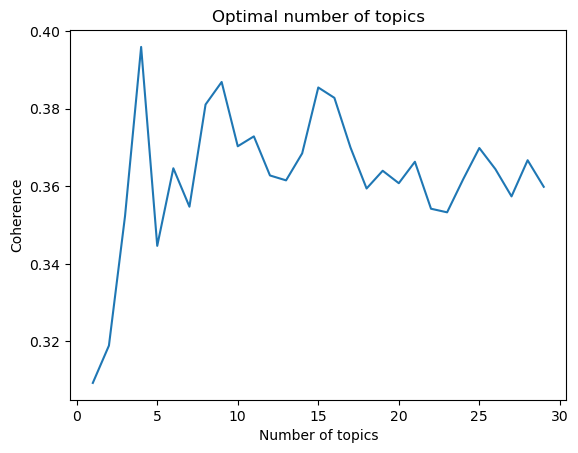

In [90]:
# Find best Coherence Score

n = 1
best_topics = 0
coherence_best = 0
y = list()

while n < 30:
    lsi_model = LsiModel(corpus, num_topics=n, id2word = idword, chunksize=500, power_iters=5, extra_samples=20)
    
    
    coherence_model = CoherenceModel(model=lsi_model, texts=data_lemmatized, dictionary=idword, coherence='c_v')
    coherence_lsi = coherence_model.get_coherence()
    y.append(coherence_lsi)
   

    if coherence_lsi > coherence_best:
        coherence_best = coherence_lsi
        best_topics = n

    n += 1

x = list(range(1,30))

plt.plot(x, y)
plt.xlabel('Number of topics')
plt.ylabel('Coherence')
plt.title('Optimal number of topics')
print('BEST NUMBER OF TOPICS: ', best_topics, 'coherence: ', coherence_best)

In [113]:
lsi_model = LsiModel(corpus, num_topics=4, id2word = idword, chunksize=500, power_iters=5, extra_samples=20)

In [114]:
 def get_lsi_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 30);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);




In [115]:
get_lsi_topics(lsi_model, 4)

Topic # 01   Topic # 02  Topic # 03       Topic # 04
0         film         star        base          produce
1       direct         film        name           comedy
2         star       direct       novel            write
3        write        write      comedy          feature
4     american     american       story            drama
5         base         base        star          animate
6       comedy        drama  screenplay             film
7      release      release       write            voice
8      produce         name     release             star
9        drama       comedy     produce           follow
10        name        novel     animate         festival
11      follow     romantic       drama            novel
12       story     festival      series            first
13     feature        first   character          picture
14        also      feature     feature            story
15       first       follow        book             name
16      action       sequel       first             base
17  screenplay      animate       voice           series
18      series       series  television          release
19       novel  documentary    american        animation
20      sequel     thriller      follow  computeranimate
21    romantic        story    festival        character
22    festival   screenplay   adventure         american
23        play       action     loosely             also
24   character      produce     fantasy           sequel
25        role        crime   animation        adventure
26    thriller          man        film          musical
27         set        voice     picture           studio
28     picture         play   superhero              new
29        life         also         set       television

In [93]:
r = get_lsi_topics(lsi_model, 4)

In [95]:
result_lsa = r.to_csv('results_lsa.csv')
